In [1]:
# Generic inputs for most ML tasks
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

pd.options.display.float_format = '{:,.2f}'.format

# setup interactive notebook mode
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import display, HTML

#### Read and pre-process data

In [2]:
# fetch data 

cereal_data = pd.read_csv('Datasets/cereal.csv')

cereal_data.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.00,5.00,6,280,25,3,1.00,0.33,68.40
1,100% Natural Bran,Q,C,120,3,5,15,2.00,8.00,8,135,0,3,1.00,1.00,33.98
2,All-Bran,K,C,70,4,1,260,9.00,7.00,5,320,25,3,1.00,0.33,59.43
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.00,8.00,0,330,25,3,1.00,0.50,93.70
4,Almond Delight,R,C,110,2,2,200,1.00,14.00,8,-1,25,3,1.00,0.75,34.38


In [3]:
cereal_data.isna().sum()


name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [4]:
# define function to import viz libraries
import plotly
plotly.offline.init_notebook_mode(connected=True)
from plotly.graph_objs import *
from plotly import tools
import plotly.graph_objects as go
import seaborn as sns

In [5]:
# correl = subset_data.corr()
correl = cereal_data.corr()

trace = go.Heatmap(z=correl.values,
                  x=correl.index.values,
                  y=correl.columns.values)
data=[trace]
plotly.offline.iplot(data, filename='basic-heatmap')

In [6]:
cereal_data.columns

Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating'],
      dtype='object')

In [7]:
cols = ['calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating']
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
subset_data = pd.DataFrame(sc.fit_transform(cereal_data[cols]), columns = cereal_data[cols].columns, index = cereal_data.index)

In [8]:
subset_data.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,-1.91,1.34,-0.01,-0.36,3.31,-2.26,-0.21,2.60,-0.15,0.96,-0.20,-2.12,1.84
1,0.68,0.42,3.99,-1.74,-0.06,-1.55,0.24,0.55,-1.27,0.96,-0.20,0.77,-0.62
2,-1.91,1.34,-0.01,1.20,2.89,-1.79,-0.44,3.16,-0.15,0.96,-0.20,-2.12,1.20
3,-2.94,1.34,-1.01,-0.24,5.00,-1.55,-1.57,3.30,-0.15,0.96,-0.20,-1.39,3.66
4,0.16,-0.50,0.99,0.48,-0.49,-0.14,0.24,-1.37,-0.15,0.96,-0.20,-0.31,-0.59


In [9]:
# Check if PCA using SVD gives same results
from sklearn.decomposition import PCA
# initializing the PCA transformer
pca = PCA(n_components = 2)
# dimensionality reduction:
data_pca = pd.DataFrame(pca.fit_transform(subset_data), index = subset_data.index)


Text(5.529765498716238, -1.8059801506901547, '0')

Text(0.26299734239543626, -1.810757156949016, '1')

Text(4.893526561825638, -2.091762047225416, '2')

Text(7.737473119477678, -0.6679501068387794, '3')

Text(-1.14642700069821, -0.21581981398133432, '4')

Text(-1.0387138632825517, -0.25379323186802205, '5')

Text(-1.3706949724542934, 0.4627489973833187, '6')

Text(-0.8480517752418382, -2.1539639208310617, '7')

Text(0.8158392508975991, 0.5494418829954432, '8')

Text(2.2045665339719513, -0.3376187254910043, '9')

Text(-2.4681410051019883, -0.6032530712466012, '10')

Text(0.4157579374312015, 0.41994875082595, '11')

Text(-2.2582492458572627, -0.6911761622120701, '12')

Text(0.6026218883942406, -1.0620339598490283, '13')

Text(-2.2315412358909428, 0.14472659510365118, '14')

Text(-1.6799922822251356, 2.0041484379004273, '15')

Text(-1.0518125082897167, 2.122966783241112, '16')

Text(-1.4952564869993827, 0.991662214720347, '17')

Text(-2.191825352477743, 0.09037301943667958, '18')

Text(1.3208994650508923, -1.9759664407481492, '19')

Text(0.6228223828386489, 2.7350552046644183, '20')

Text(-0.8210873817102302, 1.3403950799639024, '21')

Text(0.11110212540480913, -0.531299683607675, '22')

Text(-0.09157753715527676, 0.7596908274264956, '23')

Text(-1.402609603733051, 0.18717881934921696, '24')

Text(-1.7240606184330955, 0.9079695454475819, '25')

Text(1.462690102281396, 0.8942369050461293, '26')

Text(0.9266421512894932, -2.844203922026748, '27')

Text(0.5315922849402972, -2.557797189368361, '28')

Text(-1.7867788771913071, 0.27805563441365133, '29')

Text(-1.1112859604374172, 0.9863909932809901, '30')

Text(-2.106300520128188, 0.1822612135123512, '31')

Text(0.8788697638104532, 0.25527150186530895, '32')

Text(1.5280846333325444, -0.11211425727083608, '33')

Text(1.2505091432655133, -1.441106067561759, '34')

Text(-2.3449905924163477, -0.3526319651617611, '35')

Text(-0.7724673935793127, -0.23696453947315357, '36')

Text(-2.571399474330846, 1.5790731738160515, '37')

Text(-1.445967410716176, -0.16953226039388497, '38')

Text(-1.541175449375054, -2.4250692757197707, '39')

Text(-2.089437759987563, 1.7630373112609203, '40')

Text(0.9071748755810627, -0.3839710217448141, '41')

Text(-1.761524491993034, 0.10661934082825957, '42')

Text(0.9159634894112452, 1.2433223372922546, '43')

Text(-0.3152077939002092, -2.3314795585115995, '44')

Text(-0.5548013518627176, -2.4608944327880766, '45')

Text(-1.214222027310946, -4.091456300500347, '46')

Text(-0.6282597141206872, 0.9331326146092974, '47')

Text(-1.4991557759570346, -0.002294645999615458, '48')

Text(-0.5765882885769668, -2.4510262256571833, '49')

Text(1.2105615832464984, 1.2687493345561907, '50')

Text(-0.5196538338999369, -2.5820357089976516, '51')

Text(1.0222007960495862, -3.5757154118610526, '52')

Text(-1.1898157714504394, 0.4191449675966895, '53')

Text(1.7274900143023808, 4.9234994693013565, '54')

Text(2.5754819529400503, 4.404849723267712, '55')

Text(1.465074792103163, -0.48860272196287297, '56')

Text(3.0073284791777994, 0.17926005449484436, '57')

Text(0.513251467885757, -2.6926609315827554, '58')

Text(1.073822760647889, -1.2758753658851747, '59')

Text(1.6326390909057842, 0.6979047238984077, '60')

Text(-1.9500994472530404, 2.468716076706433, '61')

Text(-1.68383886685712, 1.926264883750693, '62')

Text(2.0623589038579664, 3.4321274783949742, '63')

Text(2.9250746596066834, 2.0996486836736423, '64')

Text(2.542678250427489, 2.310251264129846, '65')

Text(-0.9779444359617672, -0.28025674923135513, '66')

Text(0.5534812731452445, 1.1091234067483355, '67')

Text(1.1402400032857147, 1.6854654977184182, '68')

Text(-1.7563860545411871, 0.40453741925938436, '69')

Text(-1.2969039170401393, -4.302050636221674, '70')

Text(0.10110666857315673, -0.3195641312831243, '71')

Text(-0.947976426445381, 0.5261994986990571, '72')

Text(-2.1022645946930307, 0.5375340071090536, '73')

Text(0.7263081378407773, 0.5997110259102941, '74')

Text(0.4494477198607939, 1.0555190040672433, '75')

Text(-1.0829580045965126, 0.5924640870755499, '76')

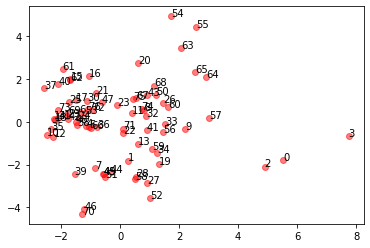

In [10]:
plt.plot(data_pca[0],data_pca[1], 'ro', alpha = 0.5)
for i in range(len(data_pca)):
    plt.text(data_pca.loc[i][0], data_pca.loc[i][1], str(i)) # cereal_data['name']) # 

plt.show()

In [11]:
correl_pca = data_pca.corr()

trace_pca = go.Heatmap(z=correl_pca.values,
                  x=correl_pca.index.values,
                  y=correl_pca.columns.values)
data_pca=[trace_pca]
plotly.offline.iplot(data_pca, filename='basic-heatmap')